# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [6]:

import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from io import StringIO

#COMO EXPLICO CARLOS TRAAJAR TABLAS CON PANDAS
URL = "https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify"
response= requests.get(URL)
html = response.text
tablas = pd.read_html(StringIO(html))
df = tablas[0]

df.columns = [col.strip() for col in df.columns]
df.rename(columns={"Streams (billions)": "Streams"}, inplace=True)
df['Streams'] = df['Streams'].astype(str)
df = df[df['Streams'].str.contains(r'^\d+\.?\d*$', na=False)]
df['Streams'] = df['Streams'].astype(float)
df.dropna(subset=["Song", "Artist(s)", "Streams", "Release date"], inplace=True)

print(df.head())

#df = df.dropnas(subset=["Song", "Artist"]) ?????????????????????????



  Rank                 Song                 Artist(s)  Streams  \
0    1    "Blinding Lights"                The Weeknd    4.913   
1    2       "Shape of You"                Ed Sheeran    4.439   
2    3            "Starboy"  The Weeknd and Daft Punk    3.973   
3    4  "Someone You Loved"             Lewis Capaldi    3.961   
4    5          "As It Was"              Harry Styles    3.952   

        Release date Ref.  
0   29 November 2019  [2]  
1     6 January 2017  [3]  
2  21 September 2016  [4]  
3    8 November 2018  [5]  
4       1 April 2022  [6]  


/tmp/ipykernel_8171/3689374680.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Streams'] = df['Streams'].astype(float)
/tmp/ipykernel_8171/3689374680.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=["Song", "Artist(s)", "Streams", "Release date"], inplace=True)


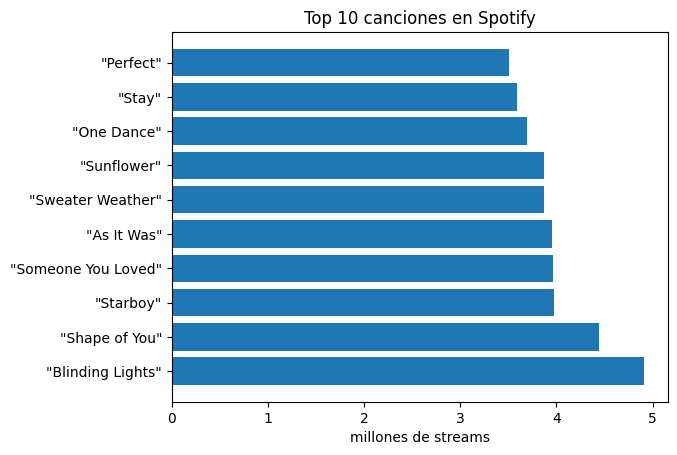

In [ ]:
# 10 canciones mas escuchasdas
top10 =df.sort_values(by="Streams",ascending=False).head(10)

plt.barh(top10["Song"], top10["Streams"])
plt.xlabel("millones de streams")
plt.title("Top 10 canciones en Spotify")
plt.show()